# Bharat interm

### Handwritten digit recognition system not only detects scanned images of handwritten digits.Handwritten digit recognition using MNIST dataset is a major project made

In [23]:
# -*- coding: utf-8 -*-
"""

@author: DIPANKAR SANTRA
"""

'\n\n@author: DIPANKAR SANTRA\n'

## <font color='Brown'>Digit Classification Case Study using Convolutional Neural Networks</font>
***

# Bharat interm

**About Convolutional Neural Networks**

deep learning CNN models to train and test, each input image will pass it through a series of convolution layers with filters (Kernals), Pooling, fully connected layers (FC) and apply Softmax function to classify an object with probabilistic values between 0 and 1. The below figure is a complete flow of CNN to process an input image and classifies the objects based on values.

![image.png](attachment:image.png)

In [1]:
# importing tensorflow and keras and other libery
from keras.datasets import mnist
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.utils import to_categorical, plot_model

In [2]:
#Importing the dataset
(xtrain,ytrain), (xtest,ytest) = mnist.load_data() # import or load the data set
print("Shape of x_train-->",xtrain.shape)
print("Shape of x_test-->",xtest.shape)

print("Shape of y_train-->",ytrain.shape)
print("Shape of y_test-->",ytest.shape)

Shape of x_train--> (60000, 28, 28)
Shape of x_test--> (10000, 28, 28)
Shape of y_train--> (60000,)
Shape of y_test--> (10000,)


In [3]:
# Defining array. Each item of array represent integer value of labels. 10 clothing item for 10 integer label.
class_names =['zorth', 'one', 'Two', 'Three', 'Four', 'Five', 'Sixth', 'Seventh', 'eighth', 'Ninth']
print("Depedent Classes--->",class_names)

Depedent Classes---> ['zorth', 'one', 'Two', 'Three', 'Four', 'Five', 'Sixth', 'Seventh', 'eighth', 'Ninth']


In [4]:
print("The no. of classess-->",len(class_names))

The no. of classess--> 10


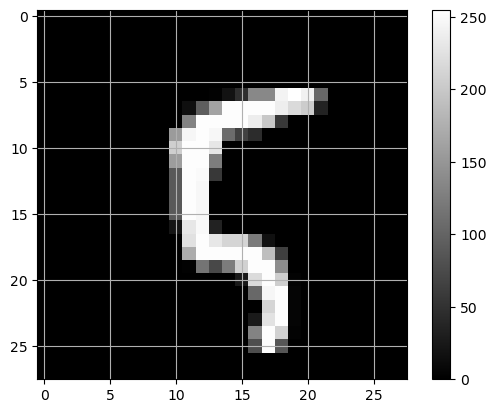

Class ID: 5 and Class name: Five


In [5]:
# inspect the data in the array

index=100 # change this number 
plt.imshow(xtrain[index], cmap='gray') # printing 10th image
plt.colorbar() # shows the bar on the right side of the image
plt.grid(True) # will shot the grid
plt.show()
print("Class ID: %s and Class name: %s" % (ytrain[index], class_names[ytrain[index]]))

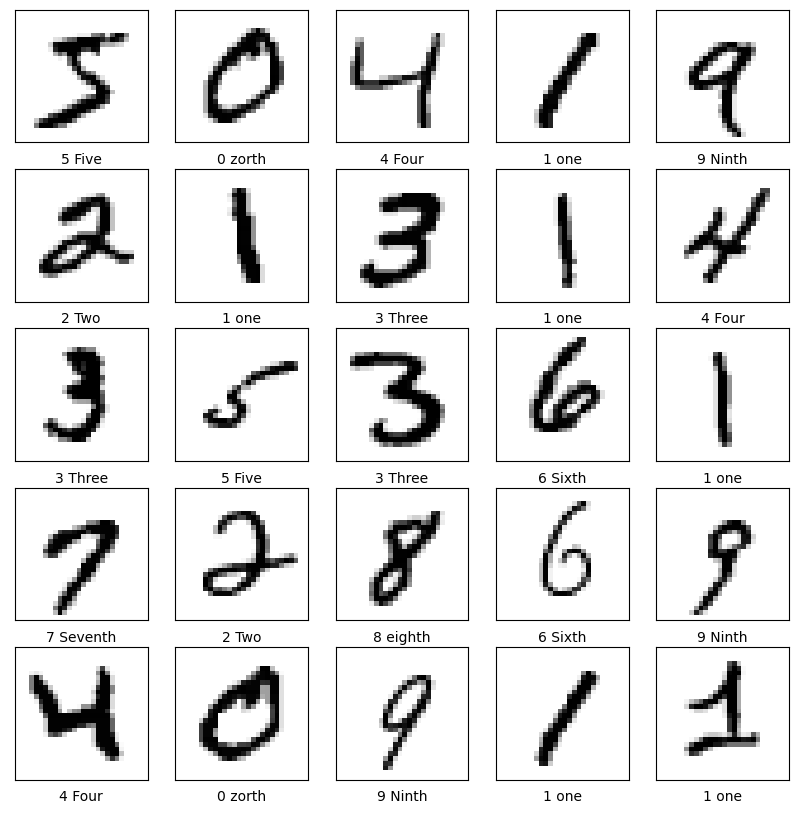

In [6]:
# display the first 25 images from traing set

plt.figure(figsize=(10,10))
for i in range(25): # 25 images
  plt.subplot(5,5,i+1) # matrix of 5 X 5 array
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(xtrain[i], cmap=plt.cm.binary) # printing binary/black and white image
  plt.xlabel("%s %s" % (ytrain[i], class_names[ytrain[i]])) # Assigning name to each image
plt.show()

In [7]:
#Scaling the image values

xtrain = xtrain/255 # So, we are scale the value between 0 to 1 before by deviding each value by 255
print(xtrain.shape)

xtest = xtest/255 # So, we are scale the value between 0 to 1 before by deviding each value by 255
print(xtest.shape)

#becuse of pixel size varies from 0 to 256 then xtrain and xtest varies [0;1]

(60000, 28, 28)
(10000, 28, 28)


In [8]:
xtrain

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [9]:
ytrain

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
ytest

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [11]:
# One hot encoding of the labels.
#(generally we do one hot encoding of the features in EDA but in this case we are doing it for labels)

# Before one hot encoding
print("ytrain Shape: %s and value: %s" % (ytrain.shape, ytrain))
print("ytest Shape: %s and value: %s" % (ytest.shape, ytest))

ytrain=to_categorical(ytrain)#one hot encoding features
ytest=to_categorical(ytest)#one hot encoding features

# After one hot encoding
print("ytrain Shape: %s and value: %s" % (ytrain.shape, ytrain[0]))
print("ytest Shape: %s and value: %s" % (ytest.shape, ytest[1]))

ytrain Shape: (60000,) and value: [5 0 4 ... 5 6 8]
ytest Shape: (10000,) and value: [7 2 1 ... 4 5 6]
ytrain Shape: (60000, 10) and value: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
ytest Shape: (10000, 10) and value: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


#### Building the CNN Architecture

In [12]:
# Modelling - Model on CNN

from tensorflow.keras import models, layers

#==================== Creation of empty Architecture ====================#
# create a sequential model i.e. empty neural network which has no layers in it.
model=models.Sequential() #empty network

#==================== Feature Detection / extraction Block ====================#
# Add first convolutional block - To deal with images we use Conv2D and for colour images and shape use Conv3D
#model.add(layers.Conv2D(filters=6, kernal_size(3,3), input_shape=(28,28,1), activation='relu'))
# in the first block we need to mention input_shape
model.add(layers.Conv2D(6,(3,3),input_shape=(28,28,1),activation='relu')) #----> 1st Convolutional Layer
# Add the max pooling layer
model.add(layers.MaxPooling2D(pool_size=(2,2))) #----> 1st Max Pooling Layer

# Add Second convolutional block
#model.add(layers.Conv2D(filters=6, kernal_size(3,3), activation='relu'))
model.add(layers.Conv2D(10,(3,3),activation='relu')) #----> 2nd Convolutional Layer
# Add the max pooling layer
model.add(layers.MaxPooling2D(pool_size=(2,2)))#----> 2nd Max Pooling Layer

#==================== Transition Block (from feature detection to classification) ====================#

# Add Flatten layer. Flatten simply converts matrics to array
model.add(layers.Flatten(input_shape=(28,28))) # this will flatten the image and after this Classification happens

#==================== Classification Block ====================#

# Classification segment - fully connected network
# The Dence layer does classification and is deep neural network. Dense layer always accept the array.
model.add(layers.Dense(128, activation='relu')) # as C5 layer in above image. 
# this 120 is hyper parameter whcih is number of neuron 
#model.add(layers.Dense(84, activation='relu'))# as F6 layer in aboave image

# Add the output layer
model.add(layers.Dense(10, activation='softmax')) # as Output layer in above image. The output layer normally have softmax activation
model


In [13]:
# Compile the model

# if we use softmax activation in output layer then best fit optimizer is categorical_crossentropy
# for sigmoid activation in output layer then loss will be binary_crossentropy

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 
# if we do not go for One Hot Encoding then use loss='sparse_categorical_crossentropy'

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 6)         60        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 10)        550       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 10)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 250)               0         
                                                                 
 dense (Dense)               (None, 128)               3

In [14]:
# Train the model 
# Using GPU really speeds up this code
xtrain2=xtrain.reshape(60000,28,28,1)
xtest2=xtest.reshape(10000,28,28,1)

# print(xtrain.shape)
# print(xtest.shape)
# print(ytrain.shape)
# print(ytest.shape)

model.fit(xtrain2,ytrain,epochs=20,batch_size=1000,verbose=True,validation_data=(xtest2,ytest))

Epoch 1/20
60/60 [==============================] - 6s 87ms/step - loss: 1.3279 - accuracy: 0.6608 - val_loss: 0.4319 - val_accuracy: 0.8812
Epoch 2/20
60/60 [==============================] - 5s 85ms/step - loss: 0.3292 - accuracy: 0.9052 - val_loss: 0.2374 - val_accuracy: 0.9328
Epoch 3/20
60/60 [==============================] - 5s 87ms/step - loss: 0.2191 - accuracy: 0.9356 - val_loss: 0.1720 - val_accuracy: 0.9507
Epoch 4/20
60/60 [==============================] - 5s 85ms/step - loss: 0.1673 - accuracy: 0.9512 - val_loss: 0.1366 - val_accuracy: 0.9593
Epoch 5/20
60/60 [==============================] - 5s 82ms/step - loss: 0.1349 - accuracy: 0.9607 - val_loss: 0.1085 - val_accuracy: 0.9684
Epoch 6/20
60/60 [==============================] - 5s 88ms/step - loss: 0.1134 - accuracy: 0.9664 - val_loss: 0.0957 - val_accuracy: 0.9713
Epoch 7/20
60/60 [==============================] - 6s 96ms/step - loss: 0.0986 - accuracy: 0.9705 - val_loss: 0.0851 - val_accuracy: 0.9748
Epoch 8/20
60

In [15]:
# evaluate accuracy of the model
test_loss, test_acc = model.evaluate(xtest2, ytest)
print("test accuracy:", test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0418 - accuracy: 0.9861
test accuracy: 0.9861000180244446


In [16]:
# predicting lable for test_images

predictions=model.predict(xtest2)

# Prediction of the 1st result. It will show the 10 predictions of labels for test image
print("1. Prediction array: %s" % (predictions[0]))

# we will verify that which result for label has highest confidence
print("2. Label number having highest confidence in prediction array: %s" % (np.argmax(predictions[0])))

# let us verify what is the label in test_labels.
print("3. Actual label in dataset: %s" % (ytest[0]))

313/313 [==============================] - 1s 3ms/step
1. Prediction array: [1.0682754e-07 8.1744661e-10 3.3716042e-06 1.9212701e-05 4.9638807e-11
 7.9608342e-10 2.7400484e-16 9.9997675e-01 9.5103410e-08 4.7706419e-07]
2. Label number having highest confidence in prediction array: 7
3. Actual label in dataset: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [17]:
# creating a funtion which will help to verify the prediction is true of not
def plot_image(i, predictions_array, true_label, img): # taking index and 3 arrays viz. prediction array, true label array and image array
  
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary) # showing b/w image

    predicted_label=np.argmax(predictions_array)
    true_label=np.argmax(true_label)

    # print(predicted_label)
    # print(true_label)

    if predicted_label == true_label: #setting up label color
        color='blue' # correct then blue colour

    else:
        color='red' # wrong then red colour

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),color=color)
  



In [18]:
##function to display bar chart showing whether image prediction is how much correct  

def plot_value_array(i, predictions_array, true_label): # taking index along with predictions and true label array
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot=plt.bar(range(10), predictions_array, color='gray')
    plt.ylim([0,1])
    predicted_label=np.argmax(predictions_array)
    true_label=np.argmax(true_label)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

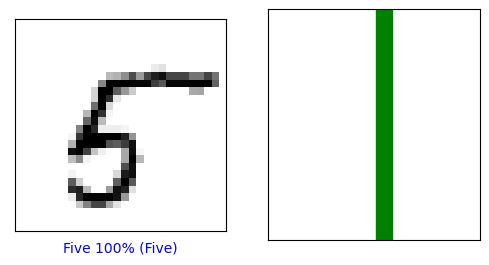

In [22]:
# call the function

# defining parameters to pass to function
i=152 # image number 56. You may change value of i for play around
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)

plot_image(i, predictions, ytest, xtest)
plt.subplot(1,2,2)
plot_value_array(i, predictions, ytest)
plt.show()

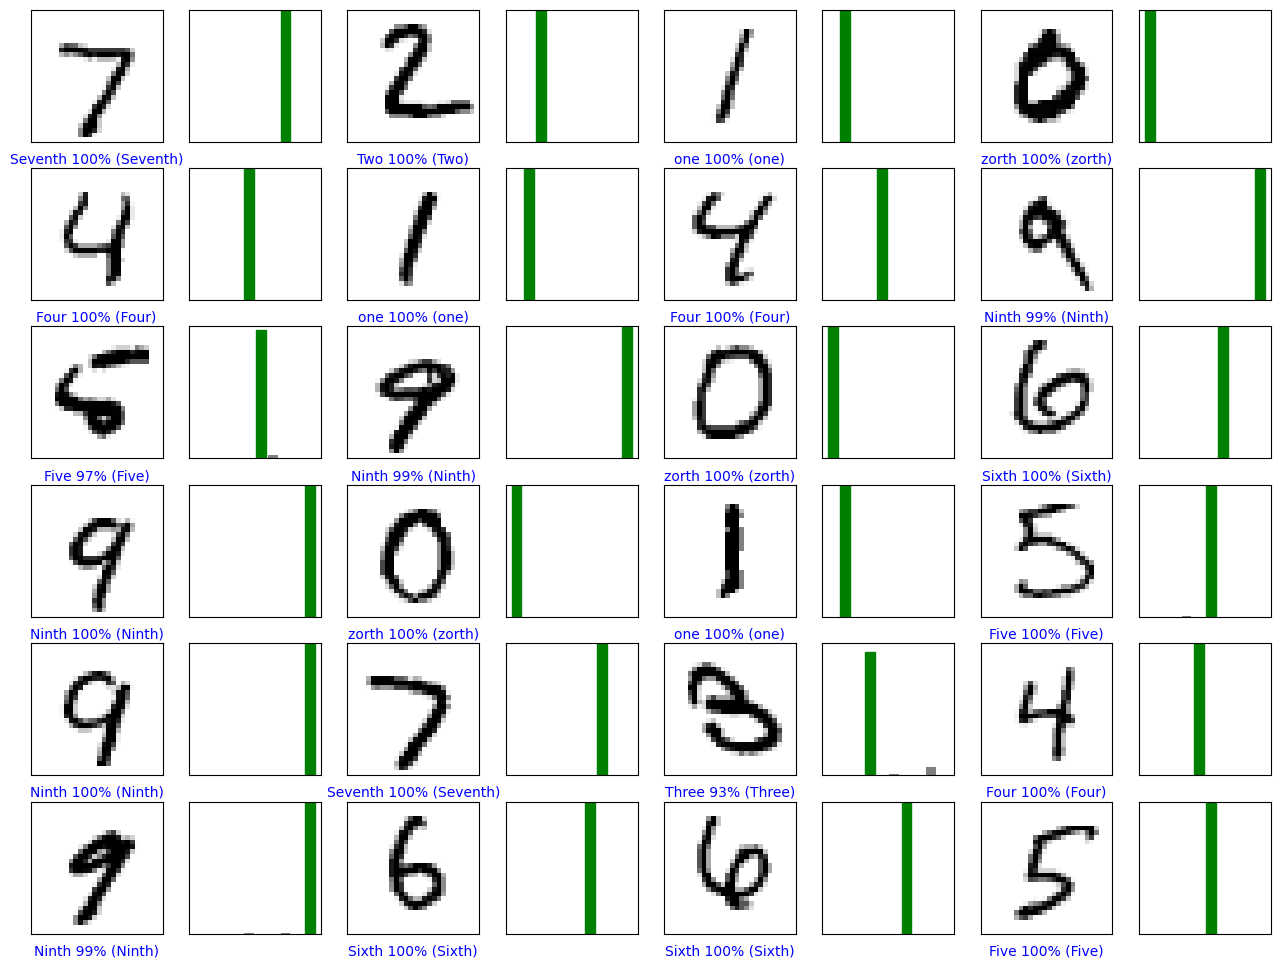

In [20]:
# verification of several images

num_rows=6
num_cols=4
num_images=num_rows*num_cols

plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_images):
      plt.subplot(num_rows, 2*num_cols, 2*i+1)
      plot_image(i,predictions, ytest, xtest)
      plt.subplot(num_rows, 2*num_cols, 2*i+2)
      plot_value_array(i, predictions, ytest)
plt.show()